In [10]:
# Looping in Langgraph

from typing import Dict, TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [11]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    counter: int

def greeting_node(state: AgentState) -> AgentState:
    """Use this node to greet the user"""
    state['name'] = f"Hey there! {state["name"]}"
    state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """This is the node that generates random number for the user"""
    state['numbers'].append(random.randint(0,10))
    state["counter"] +=1
    return state


def next_step(state: AgentState):
    """This is the node that decides the next step"""
    if(state["counter"] < 5):
        return "loop"
    else:
        return "END"

In [12]:
graph = StateGraph(AgentState)
graph.add_node("greet_node", greeting_node)
graph.add_node("random_node",random_node)

graph.add_edge(START, "greet_node")
graph.add_edge("greet_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    next_step,
    {
        "loop": "random_node",
        "END": END
    }
)

app= graph.compile()

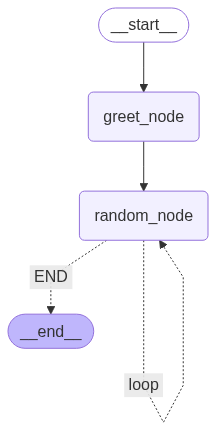

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke({
    "name": "Valli",
    "counter": -4,
    "numbers": []
})

print(result)

{'name': 'Hey there! Valli', 'numbers': [9, 10, 3, 5, 6], 'counter': 5}
